In [2]:
# Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

%matplotlib inline
plt.rcParams['figure.figsize']=(10,8)

In [3]:
# DATA PATH
DATA_SKILLS_PATH = '../../data_v2/user_skills.csv'

In [6]:
# Loading Data
df_skills = pd.read_csv(DATA_SKILLS_PATH)
print(df_skills.shape)
df_skills.head()

(164316, 2)


,user_id,skill_id
0,0,1
1,0,999999
2,151,3
3,151,4
4,151,5


In [8]:
# Data types
df_skills.dtypes

user_id     int64
skill_id    int64
dtype: object

In [10]:
# Type fixing
df_skills = df_skills.astype({'user_id':'object',
                                      'skill_id':'object'})
df_skills.dtypes

user_id     object
skill_id    object
dtype: object

In [11]:
# Null count
df_skills.isnull().sum()

user_id     0
skill_id    0
dtype: int64

In [12]:
# Unique Value counnt
df_skills.nunique()

user_id     23948
skill_id     2708
dtype: int64

`164316`(n_observations) > `23948`(n_users) that implies multiple rows pertaining to same user having different skills

In [24]:
# Duplicates row count
df_skills.duplicated().sum()

6173

In [25]:
# Drop duplicates
df_skills.drop_duplicates(inplace=True)

## Skills Analysis

In [30]:
# Top 10 skills
df_skills['skill_id'].value_counts()[:10]

64        10350
49         9494
999999     5779
43         5353
34         4774
244        4300
19         3988
76         2427
23         2194
33         2025
Name: skill_id, dtype: int64

In [71]:
# Top 10 Rare skills
df_skills['skill_id'].value_counts()[-10:]

5184    5
1400    5
5163    5
5159    5
2620    5
5138    5
5133    5
3708    5
5122    5
430     5
Name: skill_id, dtype: int64

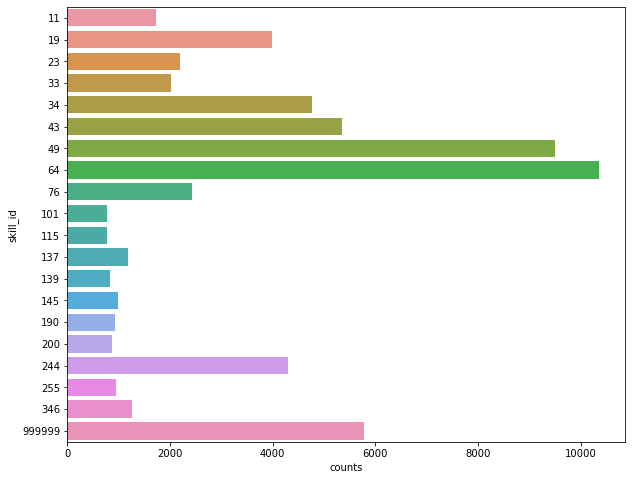

In [73]:
# Distribution of skills
skill_counts = df_skills['skill_id'].value_counts()
skill_counts = skill_counts.reset_index()\
                    .rename(columns={'skill_id':'counts',
                                     'index': 'skill_id'})\
                    .astype({'skill_id':'object'})
skill_counts.sort_values('counts', inplace=True, ascending=False)
sns.barplot(data=skill_counts.iloc[:20],
            y='skill_id',
            x='counts',
            orient='h'
            )

## User_Id to skill analysis

In [115]:
# dataFrame out of value_Counts
user_skill_counts = df_skills['user_id'].value_counts()
user_skill_counts = user_skill_counts.reset_index()\
                        .rename(columns={'user_id': 'skill_count',
                                 'index': 'user_id'})\
                        .astype({'user_id':'object'})

In [117]:
# Top 10 skilled users
user_skill_counts.sort_values('skill_count', ascending=False).iloc[:10]

,user_id,skill_count
0,6271251,102
1,2484897,100
2,6329887,90
3,7501,77
4,6338370,75
5,28096,75
6,1167881,67
7,6294580,66
8,59011,65
9,2017701,64


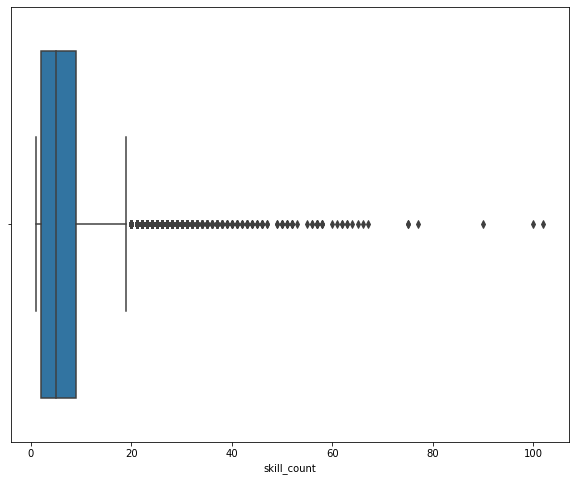

In [124]:
# Distribution of skills possesed by users
sns.boxplot(user_skill_counts['skill_count'])

In [125]:
# Stats on users_skill_counts
user_skill_counts.describe().T

,count,mean,std,min,25%,50%,75%,max
skill_count,23948.0,6.603599,6.17552,1.0,2.0,5.0,9.0,102.0


- 75%(~18k out of 24k) have atmost 9 skills